In [2]:
try:
    import altair as alt
except ModuleNotFoundError:
    !conda install -c conda-forge altair vega -y
    import altair as alt

In [3]:
df = alt.pd.read_csv("../data/processed/part_of_speech_total.csv")


artista = {
    'nach': "Nach", 
    'residente': "Residente",
}

df['artista'] = df['artista'].map(artista)

df.head()

,artista,pos,cuenta
0,Residente,sustantivo,111
1,Residente,verbo,48
2,Residente,adjetivo,22
3,Residente,nombre propio,21
4,Residente,adverbio,12


In [4]:
df['share'] = df.groupby('artista')[['cuenta']].apply(lambda x: x/x.sum())

df.head(14)

,artista,pos,cuenta,share
0,Residente,sustantivo,111,0.449393
1,Residente,verbo,48,0.194332
2,Residente,adjetivo,22,0.089069
3,Residente,nombre propio,21,0.085020
4,Residente,adverbio,12,0.048583
5,Residente,pronombre,8,0.032389
6,Residente,adposición,7,0.028340
7,Residente,determinador,7,0.028340
8,Residente,conj. subordinada,6,0.024291
9,Residente,auxiliar,4,0.016194


In [7]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ubuntu|Ubuntu+Condensed|Ubuntu+Mono');
</style>

In [8]:
condition = (
    (df['pos'] == 'adjetivo') | 
    (df['pos'] == 'nombre propio') | 
    (df['pos'] == 'sustantivo') | 
    (df['pos'] == 'verbo') | 
    (df['pos'] == 'adverbio') |
    (df['pos'] == 'verbo') 
)
dff = df[condition].copy()

In [34]:
%run theme.py

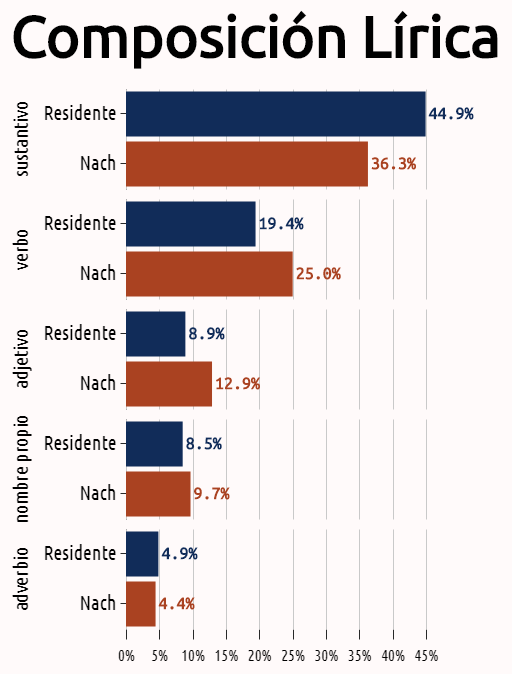

In [35]:
orden = ['sustantivo', 'verbo', 'adjetivo', 'nombre propio', 'adverbio', 'pronombre']
escala = alt.Scale(
    domain =['Residente','Nach',], 
    range = ["#112c59", "#aa4221"]
)

barras = alt.Chart().mark_bar().encode(
    x = alt.X('share:Q', axis = alt.Axis(format = '%'), sort = orden),
    y = alt.Y('artista:N', sort = ['Residente', 'Nach'], axis = alt.Axis(title = "")),
    color = alt.Color("artista:N", legend = None, sort = ['Residente','Nach'], scale = escala),
).properties(
    width = 300,
    height = 100,
)

etiquetas = barras.mark_text(
    align='left',
    baseline='middle',
    dx=3,
    fontWeight = 800,
    fontSize = 18,
).encode(
    text= alt.Text('share:Q', format = ".1%")
)

final_barras = alt.layer(barras, etiquetas, data = dff).facet(
    row = alt.Row('pos:N', sort = orden, title = "", ),
)

final_barras = final_barras.properties(title = 'Composición Lírica').configure_title(fontSize = 58)
final_barras